In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import probplot, shapiro, normaltest
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Setting style for better plots
plt.style.use('default')
sns.set_palette("husl")

In [ ]:
df = pd.read_csv("/content/blackfriday_train.csv")

In [ ]:
print(f"Dataset Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

Dataset Shape: (550068, 12)
Columns: ['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']


In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [ ]:
print(f"\nMissing Values:")
print(df.isnull().sum())


Missing Values:
User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64


In [ ]:
df['Product_Category_2'].fillna(0, inplace=True)
df['Product_Category_3'].fillna(0, inplace=True)

In [ ]:
print(df.isnull().sum())

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64


## **OUTLIER ANALYSIS WITH BOX PLOTS**


Text(0.5, 0.98, 'Outlier Analysis - Box Plots for Numerical Variables')

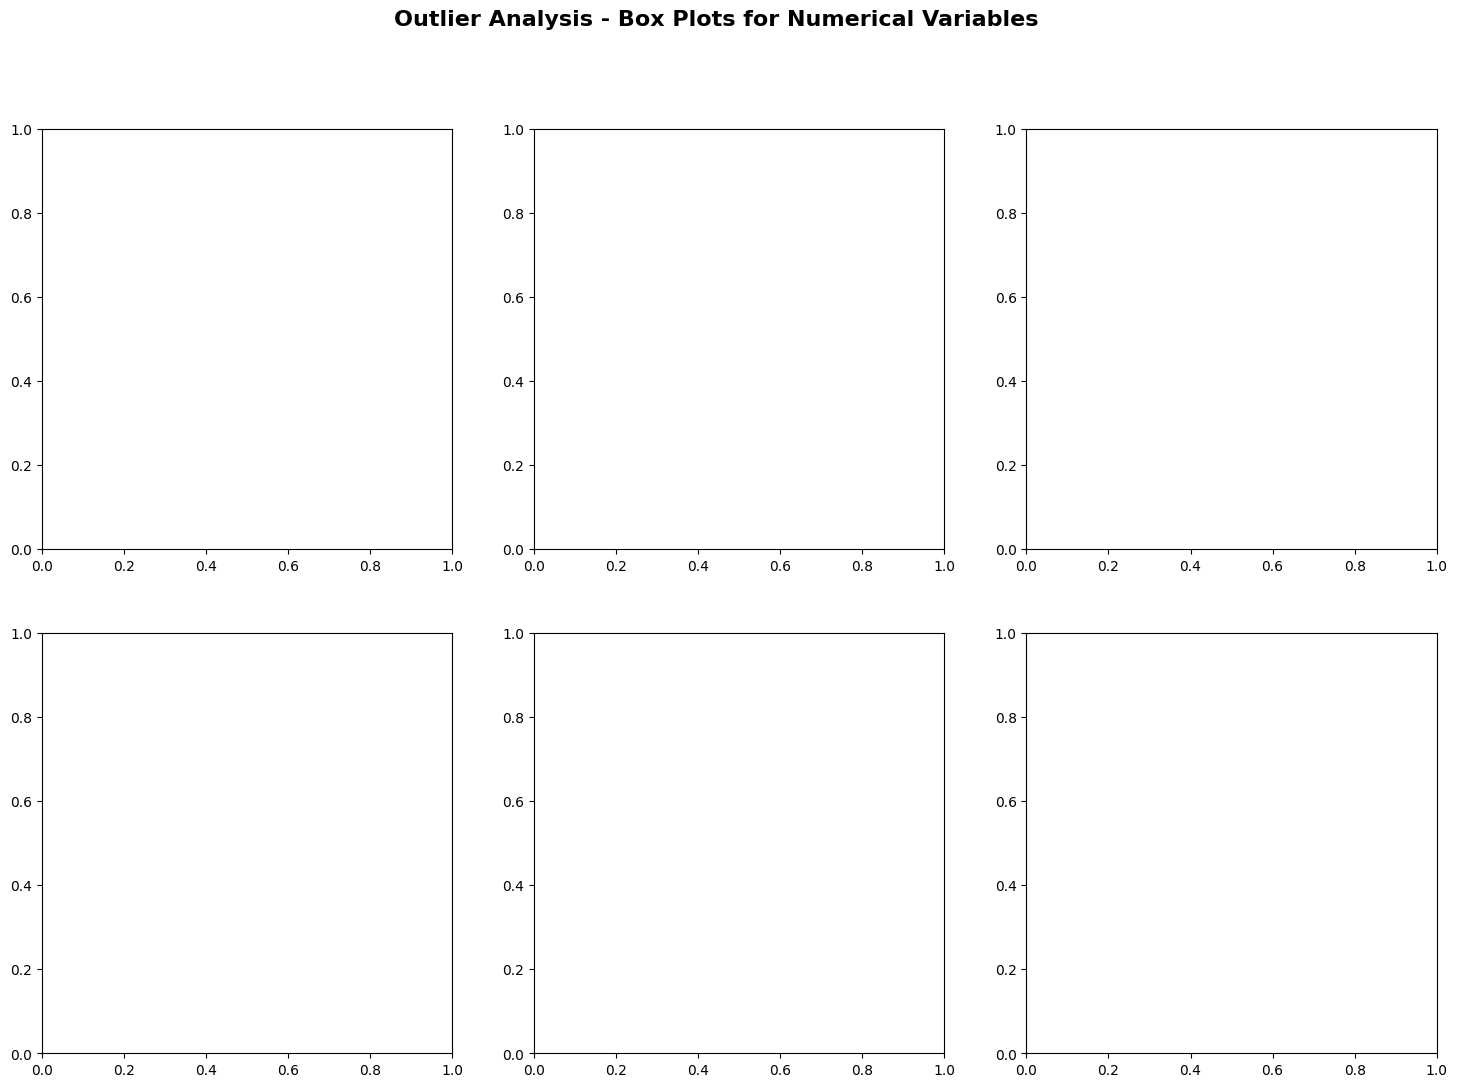

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Outlier Analysis - Box Plots for Numerical Variables', fontsize=16, fontweight='bold')

In [ ]:
numerical_cols = ['Purchase', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']

In [ ]:
# Box plot for Purchase
axes[0,0].boxplot(df['Purchase'], vert=True, patch_artist=True,
                  boxprops=dict(facecolor='lightblue', alpha=0.7))
axes[0,0].set_title('Purchase Amount', fontweight='bold')
axes[0,0].set_ylabel('Purchase ($)')
axes[0,0].grid(True, alpha=0.3)

In [ ]:
# Box plots for Product Categories
for i, col in enumerate(['Product_Category_1', 'Product_Category_2', 'Product_Category_3']):
    row, col_idx = (0, i+1) if i < 2 else (1, i-2)
    axes[row, col_idx].boxplot(df[col], vert=True, patch_artist=True, boxprops=dict(facecolor='lightgreen', alpha=0.7))
    axes[row, col_idx].set_title(f'{col}', fontweight='bold')
    axes[row, col_idx].set_ylabel('Category Code')
    axes[row, col_idx].grid(True, alpha=0.3)

In [ ]:
# Box plot by Gender
sns.boxplot(data=df, x='Gender', y='Purchase', ax=axes[1,1])
axes[1,1].set_title('Purchase by Gender', fontweight='bold')
axes[1,1].grid(True, alpha=0.3)

In [ ]:
# Box plot by Age
sns.boxplot(data=df, x='Age', y='Purchase', ax=axes[1,2])
axes[1,2].set_title('Purchase by Age Group', fontweight='bold')
axes[1,2].tick_params(axis='x', rotation=45)
axes[1,2].grid(True, alpha=0.3)

In [ ]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [ ]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

In [ ]:
print(f"\nOutlier Detection Results (IQR Method):")
print("-" * 50)
for col in numerical_cols:
    outliers, lower, upper = detect_outliers_iqr(df, col)
    outlier_percentage = (len(outliers) / len(df)) * 100

    print(f"\n{col}:")
    print(f"  Lower Bound: {lower:.2f}")
    print(f"  Upper Bound: {upper:.2f}")
    print(f"  Number of Outliers: {len(outliers):,}")
    print(f"  Percentage of Outliers: {outlier_percentage:.2f}%")
    print(f"  Min Value: {df[col].min():.2f}")
    print(f"  Max Value: {df[col].max():.2f}")


Outlier Detection Results (IQR Method):
--------------------------------------------------

Purchase:
  Lower Bound: -3523.50
  Upper Bound: 21400.50
  Number of Outliers: 2,677
  Percentage of Outliers: 0.49%
  Min Value: 12.00
  Max Value: 23961.00

Product_Category_1:
  Lower Bound: -9.50
  Upper Bound: 18.50
  Number of Outliers: 4,153
  Percentage of Outliers: 0.75%
  Min Value: 1.00
  Max Value: 20.00

Product_Category_2:
  Lower Bound: -21.00
  Upper Bound: 35.00
  Number of Outliers: 0
  Percentage of Outliers: 0.00%
  Min Value: 0.00
  Max Value: 18.00

Product_Category_3:
  Lower Bound: -12.00
  Upper Bound: 20.00
  Number of Outliers: 0
  Percentage of Outliers: 0.00%
  Min Value: 0.00
  Max Value: 18.00


## **CORRELATION ANALYSIS**

In [ ]:
df_encoded = df.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
categorical_cols = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

In [ ]:
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    print(f"Encoded {col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

Encoded Gender: {'F': np.int64(0), 'M': np.int64(1)}
Encoded Age: {'0-17': np.int64(0), '18-25': np.int64(1), '26-35': np.int64(2), '36-45': np.int64(3), '46-50': np.int64(4), '51-55': np.int64(5), '55+': np.int64(6)}
Encoded City_Category: {'A': np.int64(0), 'B': np.int64(1), 'C': np.int64(2)}
Encoded Stay_In_Current_City_Years: {'0': np.int64(0), '1': np.int64(1), '2': np.int64(2), '3': np.int64(3), '4+': np.int64(4)}


In [ ]:
correlation_matrix = df_encoded.select_dtypes(include=[np.number]).corr()

In [ ]:
print(f"\nCorrelation with Purchase (Target Variable):")
purchase_corr = correlation_matrix['Purchase'].sort_values(ascending=False)
print(purchase_corr)


Correlation with Purchase (Target Variable):
Purchase                      1.000000
Product_Category_3            0.288501
City_Category                 0.061914
Gender                        0.060346
Product_Category_2            0.052288
Occupation                    0.020833
Age                           0.015839
Stay_In_Current_City_Years    0.005422
User_ID                       0.004716
Marital_Status               -0.000463
Product_Category_1           -0.343703
Name: Purchase, dtype: float64


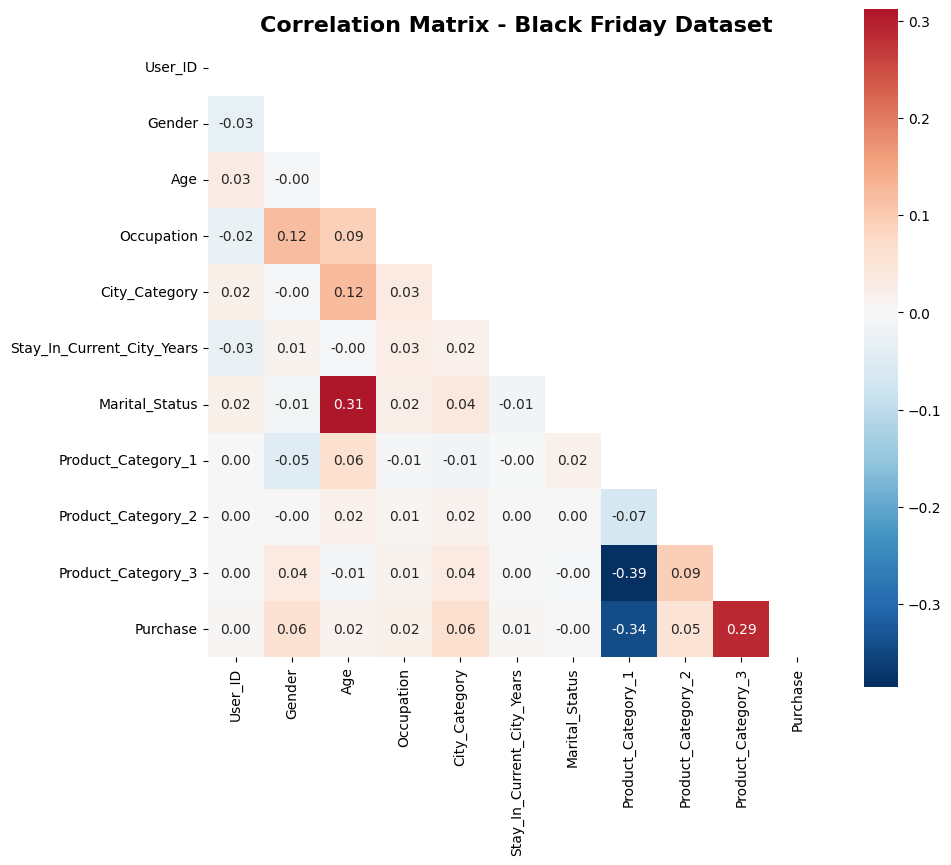

In [ ]:
plt.figure(figsize=(10, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix,
            mask=mask,
            annot=True,
            cmap='RdBu_r',
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={"shrink": .8})
plt.title('Correlation Matrix - Black Friday Dataset', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10, 8))
purchase_corr_abs = purchase_corr.abs().sort_values(ascending=True)
colors = ['red' if x < 0 else 'blue' for x in purchase_corr[purchase_corr_abs.index]]

<Figure size 1000x800 with 0 Axes>

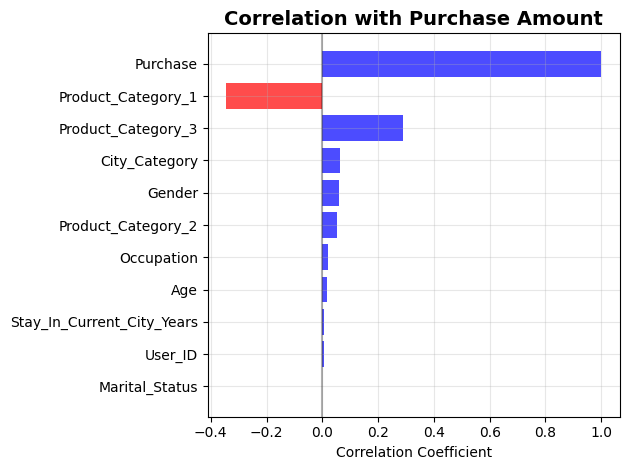

In [ ]:
plt.barh(range(len(purchase_corr_abs)), purchase_corr[purchase_corr_abs.index], color=colors, alpha=0.7)
plt.yticks(range(len(purchase_corr_abs)), purchase_corr_abs.index)
plt.xlabel('Correlation Coefficient')
plt.title('Correlation with Purchase Amount', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
strong_correlations = correlation_matrix[abs(correlation_matrix) > 0.1].stack().reset_index()
strong_correlations = strong_correlations[strong_correlations['level_0'] != strong_correlations['level_1']]
strong_correlations.columns = ['Variable1', 'Variable2', 'Correlation']
strong_correlations = strong_correlations[abs(strong_correlations['Correlation']) > 0.1]
strong_correlations = strong_correlations.sort_values('Correlation', key=abs, ascending=False)

In [ ]:
print(strong_correlations.head(10))

             Variable1           Variable2  Correlation
17  Product_Category_3  Product_Category_1    -0.385534
14  Product_Category_1  Product_Category_3    -0.385534
15  Product_Category_1            Purchase    -0.343703
20            Purchase  Product_Category_1    -0.343703
11      Marital_Status                 Age     0.311738
5                  Age      Marital_Status     0.311738
21            Purchase  Product_Category_3     0.288501
19  Product_Category_3            Purchase     0.288501
4                  Age       City_Category     0.123079
8        City_Category                 Age     0.123079


## **NORMALITY ANALYSIS - Q-Q PLOTS AND PROBABILITY PLOTS**


Text(0.5, 0.98, 'Normality Analysis - Q-Q Plots and Distribution Analysis')

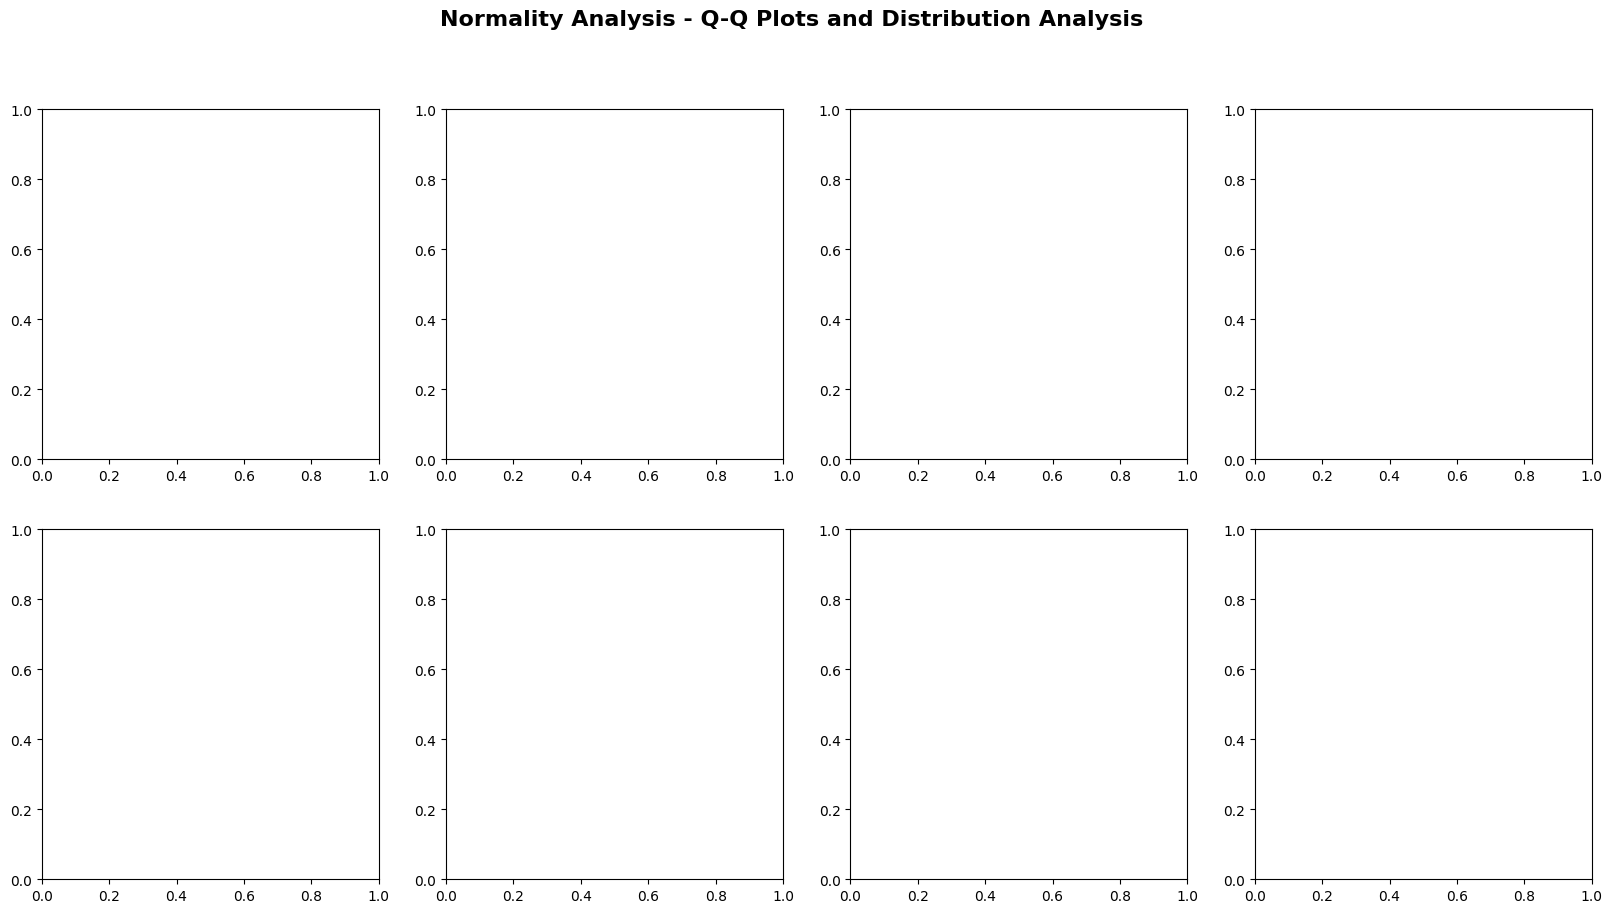

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Normality Analysis - Q-Q Plots and Distribution Analysis', fontsize=16, fontweight='bold')

In [ ]:
normality_cols = ['Purchase', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']
normality_results = {}

In [ ]:
for i, col in enumerate(normality_cols):
    # Q-Q Plot (Quantile-Quantile Plot)
    probplot(df[col], dist="norm", plot=axes[0, i])
    axes[0, i].set_title(f'Q-Q Plot: {col}', fontweight='bold')
    axes[0, i].grid(True, alpha=0.3)

    # Histogram with normal curve overlay
    axes[1, i].hist(df[col], bins=50, density=True, alpha=0.7, color='skyblue', edgecolor='black')

    # Overlay normal distribution curve
    mu, sigma = stats.norm.fit(df[col])
    x = np.linspace(df[col].min(), df[col].max(), 100)
    axes[1, i].plot(x, stats.norm.pdf(x, mu, sigma), 'r-', linewidth=2, label=f'Normal (μ={mu:.0f}, σ={sigma:.0f})')

    axes[1, i].set_title(f'Distribution: {col}', fontweight='bold')
    axes[1, i].set_ylabel('Density')
    axes[1, i].legend()
    axes[1, i].grid(True, alpha=0.3)

    # Statistical tests for normality
    # Shapiro-Wilk test (for smaller samples)
    if len(df[col]) <= 5000:  # Shapiro-Wilk is limited to 5000 samples
        shapiro_stat, shapiro_p = shapiro(df[col].sample(5000) if len(df[col]) > 5000 else df[col])
    else:
        shapiro_stat, shapiro_p = shapiro(df[col].sample(5000))

    # D'Agostino's normality test
    dagostino_stat, dagostino_p = normaltest(df[col])

    # Kolmogorov-Smirnov test
    ks_stat, ks_p = stats.kstest(df[col], 'norm', args=(df[col].mean(), df[col].std()))

    normality_results[col] = {
        'shapiro_stat': shapiro_stat,
        'shapiro_p': shapiro_p,
        'dagostino_stat': dagostino_stat,
        'dagostino_p': dagostino_p,
        'ks_stat': ks_stat,
        'ks_p': ks_p,
        'skewness': stats.skew(df[col]),
        'kurtosis': stats.kurtosis(df[col])
    }

In [ ]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [ ]:
print(f"\nNormality Test Results:")
print("-" * 80)
print("{:<20} {:<15} {:<15} {:<15} {:<10} {:<10}".format(
    "Variable", "Shapiro-Wilk", "D'Agostino", "K-S Test", "Skewness", "Kurtosis"
))
print(f"{'':20} {'(p-value)':<15} {'(p-value)':<15} {'(p-value)':<15} {'':10} {'':10}")
print("-" * 80)

for col, results in normality_results.items():
    print(f"{col:<20} "
          f"{results['shapiro_p']:<15.4f} "
          f"{results['dagostino_p']:<15.4f} "
          f"{results['ks_p']:<15.4f} "
          f"{results['skewness']:<10.3f} "
          f"{results['kurtosis']:<10.3f}")

print(f"\nInterpretation (α = 0.05):")
print("- p-value < 0.05: Reject null hypothesis (NOT normally distributed)")
print("- p-value ≥ 0.05: Fail to reject null hypothesis (possibly normally distributed)")
print("- Skewness close to 0: symmetric distribution")
print("- Kurtosis close to 0: normal peak (3 for excess kurtosis)")


Normality Test Results:
--------------------------------------------------------------------------------
Variable             Shapiro-Wilk    D'Agostino      K-S Test        Skewness   Kurtosis  
                     (p-value)       (p-value)       (p-value)                            
--------------------------------------------------------------------------------
Purchase             0.0000          0.0000          0.0000          0.600      -0.338    
Product_Category_1   0.0000          0.0000          0.0000          1.026      1.235     
Product_Category_2   0.0000          0.0000          0.0000          0.310      -1.476    
Product_Category_3   0.0000          0.0000          0.0000          1.185      -0.365    

Interpretation (α = 0.05):
- p-value < 0.05: Reject null hypothesis (NOT normally distributed)
- p-value ≥ 0.05: Fail to reject null hypothesis (possibly normally distributed)
- Skewness close to 0: symmetric distribution
- Kurtosis close to 0: normal peak (3 for ex


Log Transformation Analysis for Purchase:
--------------------------------------------------
Original Purchase - Shapiro p-value: 0.0000
Log(Purchase) - Shapiro p-value: 0.0000
Original Purchase - Skewness: 0.600
Log(Purchase) - Skewness: -2.203


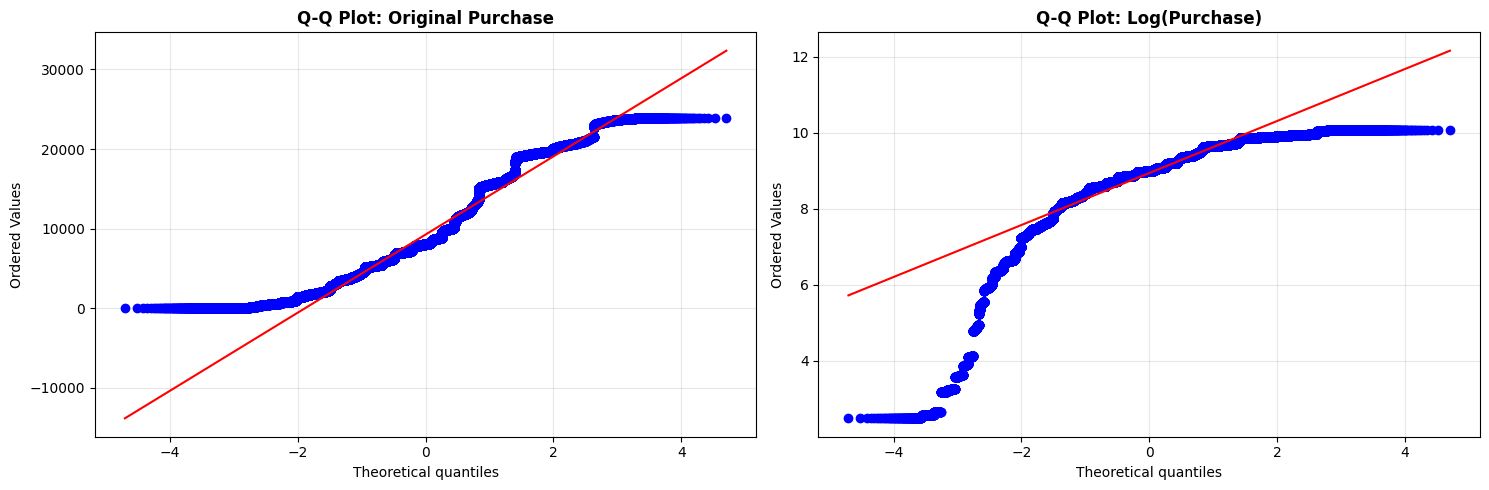

In [ ]:
if 'Purchase' in df.columns:
    print(f"\nLog Transformation Analysis for Purchase:")
    print("-" * 50)

    # Log transform Purchase
    log_purchase = np.log(df['Purchase'])

    # Test normality of log-transformed data
    shapiro_stat_log, shapiro_p_log = shapiro(log_purchase.sample(5000) if len(log_purchase) > 5000 else log_purchase)
    dagostino_stat_log, dagostino_p_log = normaltest(log_purchase)

    print(f"Original Purchase - Shapiro p-value: {normality_results['Purchase']['shapiro_p']:.4f}")
    print(f"Log(Purchase) - Shapiro p-value: {shapiro_p_log:.4f}")
    print(f"Original Purchase - Skewness: {normality_results['Purchase']['skewness']:.3f}")
    print(f"Log(Purchase) - Skewness: {stats.skew(log_purchase):.3f}")

    # Plot comparison
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Original Purchase Q-Q plot
    probplot(df['Purchase'], dist="norm", plot=axes[0])
    axes[0].set_title('Q-Q Plot: Original Purchase', fontweight='bold')
    axes[0].grid(True, alpha=0.3)

    # Log-transformed Purchase Q-Q plot
    probplot(log_purchase, dist="norm", plot=axes[1])
    axes[1].set_title('Q-Q Plot: Log(Purchase)', fontweight='bold')
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()